## Import Libraries

In [248]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [250]:
df = pd.read_csv("final_data_msb.csv")

In [251]:
df.columns

Index(['Unnamed: 0', 'team', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [252]:
df.shape

(4506, 19)

In [253]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [254]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


## Preprocess the Data

In [256]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [257]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [258]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [259]:
df.shape

(4506, 18)

In [260]:
df.shape

(4506, 18)

In [261]:
#df[df['Type']=='Other']

In [262]:
df.shape

(4506, 18)

In [263]:
df.shape

(4506, 18)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [266]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 
                    'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 
                    'highest_value']

In [267]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [268]:
categorical_features

['team', 'position']

In [269]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [270]:
df.shape

(4506, 399)

In [271]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Attack-SecondStriker,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,True,False,False,False,False,False
1,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [273]:
# sns.heatmap(df.corr(), annot=True);

In [274]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.712995
appearance             0.327357
minutes played         0.314029
assists                0.105213
                         ...   
team_SV Ried          -0.050444
days_injured          -0.065745
goals conceded        -0.109175
position_Goalkeeper   -0.123967
age                   -0.262230
Name: current_value, Length: 399, dtype: float64


In [275]:
# Set the correlation threshold
threshold = 0.25  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'current_value',
       'highest_value'],
      dtype='object')

In [276]:
selected_features = ['age', 'appearance', 'minutes played', 'current_value',
       'highest_value']

In [277]:
df = df[selected_features]
df.head()

,age,appearance,minutes played,current_value,highest_value
0,37.0,4,292,600000,6000000
1,21.0,34,2758,2000000,2000000
2,21.0,34,1030,3000000,7000000
3,33.0,31,2790,600000,3500000
4,30.0,8,644,600000,2000000


#### 4. Prepare train and test data

In [279]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [280]:
X.shape

(4506, 4)

## Buliding the Model

In [282]:
model = LinearRegression()

In [283]:
ridge_model = Ridge()

In [284]:
lasso_model = Lasso()

In [285]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [287]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [288]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [289]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [290]:
grid_search_ridge.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [291]:
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 3e-07, 0.0002, 0.001, 0.01, 0.5, 1, 5]},
             scoring='neg_mean_squared_error', verbose=1)

## Test the Model

In [293]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [294]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [295]:
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [296]:
# Best hyperparameter
print("Best parameters found: ", grid_search_ridge.best_params_)

# Best model
best_ridge = grid_search_ridge.best_estimator_

Best parameters found:  {'alpha': 0.5}


In [297]:
# Best hyperparameter
print("Best parameters found: ", grid_search_lasso.best_params_)

# Best model
best_lasso = grid_search_lasso.best_estimator_

Best parameters found:  {'alpha': 0}


In [298]:
y_pred_ridge_cv = best_ridge.predict(X_test_scaled)

In [299]:
y_pred_lasso_cv = best_lasso.predict(X_test_scaled)

## Interpretation of the Model

In [301]:
model.coef_

array([-569772.24049163, -293224.18968999,  512590.28577654,
       1156810.72816563])

In [302]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.697722e+05
appearance,-2.932242e+05
minutes played,5.125903e+05
highest_value,1.156811e+06


In [303]:
print(model.intercept_) 

1496656.4927857935


In [304]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.697700e+05
appearance,-2.932074e+05
minutes played,5.125740e+05
highest_value,1.156809e+06


In [305]:
coeff_df = pd.DataFrame(best_lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.697722e+05
appearance,-2.932242e+05
minutes played,5.125903e+05
highest_value,1.156811e+06


In [306]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.694488e+05
appearance,-2.912752e+05
minutes played,5.107250e+05
highest_value,1.156379e+06


In [307]:
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.696103e+05
appearance,-2.922476e+05
minutes played,5.116556e+05
highest_value,1.156595e+06


## Evaluating the Model 

1. Mean Square Error

In [310]:
y_base = [y_train.mean()] * len(y_test)

In [311]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 2846589765041.2637


In [312]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 932536326707.7872
Mean Squared Error for testing: 1004934393170.4939


2. Mean Absolute Error

In [314]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1246695.190857165


In [315]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 708363.4344502932
Mean Absolute Error for testing: 727730.1190184534


3. Root Mean Squared Error

In [317]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1116.555055004976


In [318]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 965679.2048645281
Root Mean Squared Error for testing: 1002464.1605416595


4. R Square

In [320]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6427372365313484
R Square for testing: 0.6466677058961654


#### Predictions vs. Real Values

In [322]:
predictions = model.predict(X_test_scaled)
#predictions

In [323]:
Real_Values = np.array(y_test)
#Real_Values

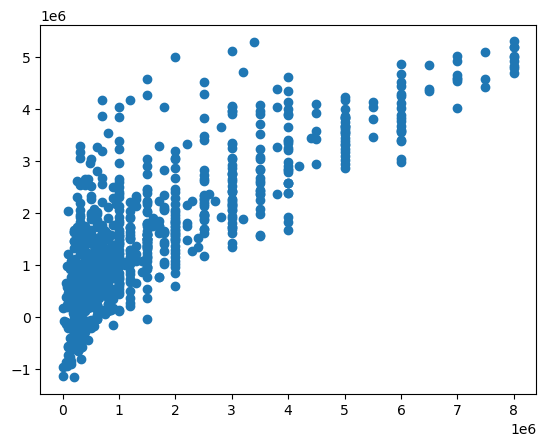

In [324]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

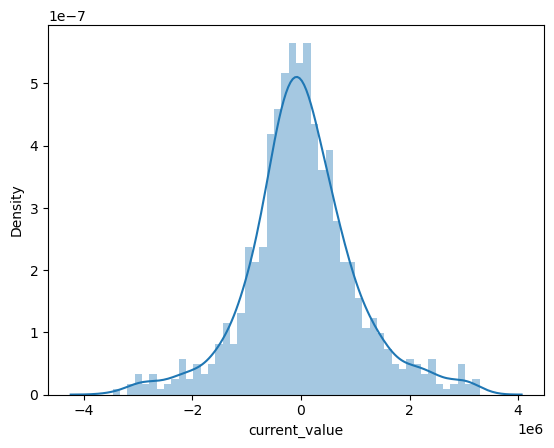

In [326]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution